In [1]:
import os 
import numpy as np

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 24C6-591C

 Directory of C:\Users\ninja\Desktop\takvim\11 hafta\HAFTA_1_18_06_2024\projeler\hiperspektral

19.06.2024  23:52    <DIR>          .
19.06.2024  23:52    <DIR>          ..
19.06.2024  22:29    <DIR>          .ipynb_checkpoints
13.12.2023  13:59        55.446.701 Houston13.mat
13.12.2023  13:58            15.541 Houston13_7gt.mat
13.12.2023  13:59        47.204.960 Houston18.mat
13.12.2023  13:59            47.688 Houston18_7gt.mat
19.06.2024  23:52         2.178.804 hyperspectral houston map.ipynb
               5 File(s)    104.893.694 bytes
               3 Dir(s)  12.458.389.504 bytes free


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans
import scipy.io


In [4]:
import h5py

 
file_path = 'Houston18.mat'

with h5py.File(file_path, 'r') as f:
    print("Groups in HDF5 file:", list(f.keys()))
    dataset = f['ori_data']  
    data = dataset[:]   
    print(data.shape)   
    print(data)          


Groups in HDF5 file: ['ori_data']
(48, 954, 210)
[[[0.01794693 0.01875919 0.01786958 ... 0.02057709 0.01752147 0.01752147]
  [0.02231763 0.02193084 0.01906862 ... 0.01895258 0.01632243 0.01632243]
  [0.02285913 0.02065444 0.02142802 ... 0.017096   0.01551017 0.01551017]
  ...
  [0.02699776 0.02722983 0.02525721 ... 0.03047884 0.03221939 0.03221939]
  [0.02626286 0.02703644 0.02610815 ... 0.03276089 0.03005338 0.03005338]
  [0.02595343 0.02680436 0.02614682 ... 0.03411464 0.03361182 0.03361182]]

 [[0.04769088 0.04080606 0.0362033  ... 0.04003249 0.03423068 0.03423068]
  [0.05248704 0.04865785 0.03933627 ... 0.03357314 0.03194863 0.03194863]
  [0.05712849 0.05070782 0.04676259 ... 0.03214203 0.02966659 0.02966659]
  ...
  [0.05287383 0.05380212 0.05082386 ... 0.0667595  0.06645007 0.06645007]
  [0.05109461 0.05210026 0.05171347 ... 0.06896418 0.06556045 0.06556045]
  [0.05136536 0.0494701  0.05028235 ... 0.06865475 0.07151698 0.07151698]]

 [[0.11503056 0.07774426 0.06300766 ... 0.06648

In [5]:
import h5py
file_path = 'Houston18_7gt.mat'
with h5py.File(file_path, 'r') as f:
    print("Groups in HDF5 file:", list(f.keys()))
    dataset_gt = f['map'] 
    data_gt = dataset_gt[:]  
    print(data_gt.shape)  
    print(data_gt)         


Groups in HDF5 file: ['map']
(954, 210)
[[6. 0. 0. ... 0. 0. 0.]
 [6. 0. 0. ... 0. 0. 0.]
 [6. 6. 0. ... 7. 0. 0.]
 ...
 [0. 0. 0. ... 6. 6. 6.]
 [0. 0. 0. ... 6. 6. 6.]
 [0. 0. 0. ... 6. 6. 6.]]


In [6]:
data_gt.shape

(954, 210)

In [7]:
data_gt

array([[6., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       [6., 6., 0., ..., 7., 0., 0.],
       ...,
       [0., 0., 0., ..., 6., 6., 6.],
       [0., 0., 0., ..., 6., 6., 6.],
       [0., 0., 0., ..., 6., 6., 6.]])

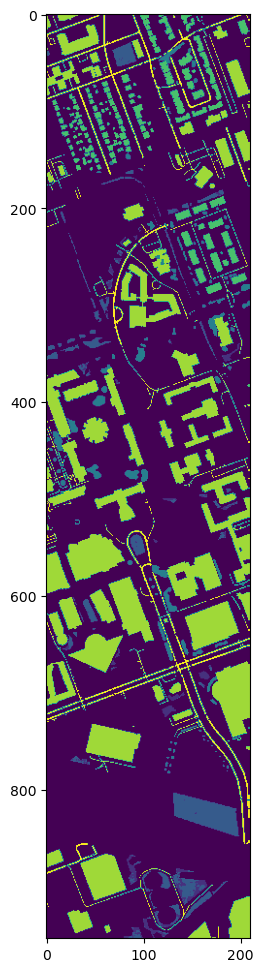

In [8]:
plt.figure(figsize=(12,12))
plt.imshow(data_gt)

In [9]:
unique_values = np.unique(data_gt)
unique_values

array([0., 1., 2., 3., 4., 5., 6., 7.])

In [10]:
data.shape

(48, 954, 210)

In [11]:
data

array([[[0.01794693, 0.01875919, 0.01786958, ..., 0.02057709,
         0.01752147, 0.01752147],
        [0.02231763, 0.02193084, 0.01906862, ..., 0.01895258,
         0.01632243, 0.01632243],
        [0.02285913, 0.02065444, 0.02142802, ..., 0.017096  ,
         0.01551017, 0.01551017],
        ...,
        [0.02699776, 0.02722983, 0.02525721, ..., 0.03047884,
         0.03221939, 0.03221939],
        [0.02626286, 0.02703644, 0.02610815, ..., 0.03276089,
         0.03005338, 0.03005338],
        [0.02595343, 0.02680436, 0.02614682, ..., 0.03411464,
         0.03361182, 0.03361182]],

       [[0.04769088, 0.04080606, 0.0362033 , ..., 0.04003249,
         0.03423068, 0.03423068],
        [0.05248704, 0.04865785, 0.03933627, ..., 0.03357314,
         0.03194863, 0.03194863],
        [0.05712849, 0.05070782, 0.04676259, ..., 0.03214203,
         0.02966659, 0.02966659],
        ...,
        [0.05287383, 0.05380212, 0.05082386, ..., 0.0667595 ,
         0.06645007, 0.06645007],
        [0.0

In [12]:
data.shape

(48, 954, 210)

In [13]:
data[0].shape

(954, 210)

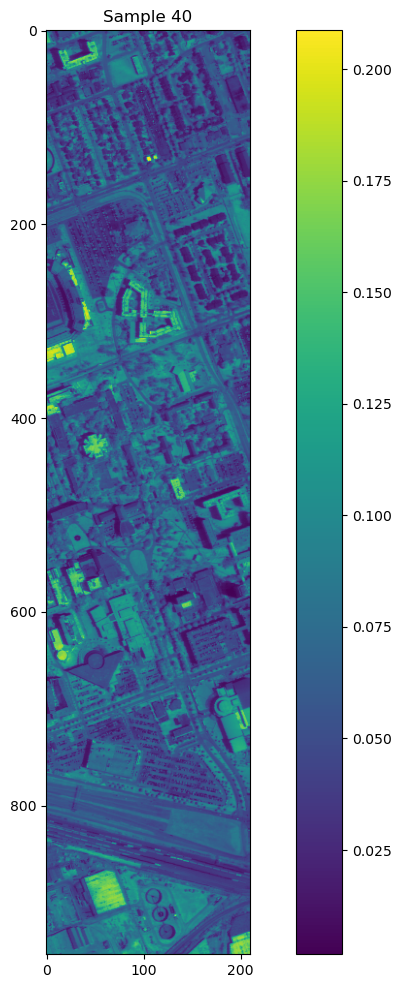

In [14]:
sample_index = 40 
plt.figure(figsize=(12, 12))
plt.imshow(data[sample_index], cmap='viridis')   
plt.title(f'Sample {sample_index}')
plt.colorbar()
plt.show()

In [15]:
data_gt.shape

(954, 210)

In [16]:
n_clusters=8

In [17]:
data.shape

(48, 954, 210)

# K MEANS

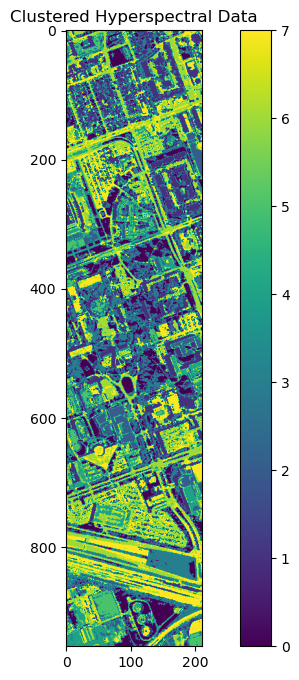

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

reshaped_data = data.transpose(1, 2, 0).reshape(-1, 48)

# normalize data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(reshaped_data)

# applying pca
pca = PCA(n_components=30)  # Choose the number of components you want
pca_data = pca.fit_transform(normalized_data)

kmeans = KMeans(n_clusters=8, random_state=42)  
clusters = kmeans.fit_predict(pca_data)
clustered_image = clusters.reshape(954, 210)


plt.figure(figsize=(10, 8))
plt.imshow(clustered_image, cmap='viridis')
plt.title('Clustered Hyperspectral Data')
plt.colorbar()
plt.show()


In [ ]:
clustered_image.shape

In [ ]:
data_gt.shape

In [20]:
954*210

200340

In [21]:
from sklearn.metrics import accuracy_score


# DBS SCAN CLUSTERİNG 

DBSCAN Accuracy: 0.7500990303635706


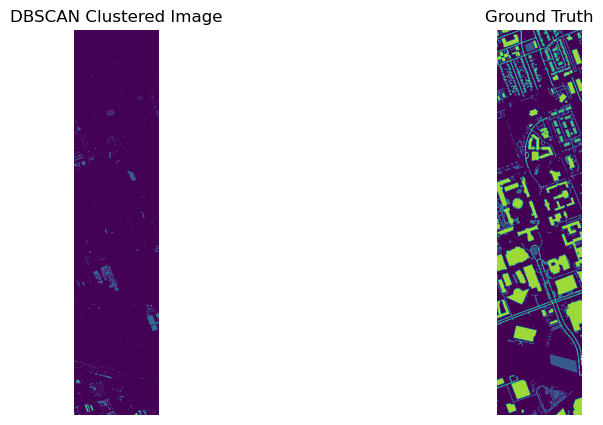

In [22]:
from sklearn.cluster import DBSCAN

 
dbscan = DBSCAN(eps=0.4, min_samples=8)
dbscan_clusters = dbscan.fit_predict(pca_data)

 
dbscan_clustered_image = dbscan_clusters.reshape(954, 210)

 
positive_indices = dbscan_clusters >= 0
dbscan_accuracy = accuracy_score(data_gt.flatten()[positive_indices], dbscan_clustered_image.flatten()[positive_indices])
print(f"DBSCAN Accuracy: {dbscan_accuracy}")

 
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(dbscan_clustered_image, cmap='viridis')
plt.title('DBSCAN Clustered Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(data_gt, cmap='viridis')
plt.title('Ground Truth')
plt.axis('off')

plt.show()


In [23]:
data_pca=pca_data

GMM Accuracy: 0.16794948587401418


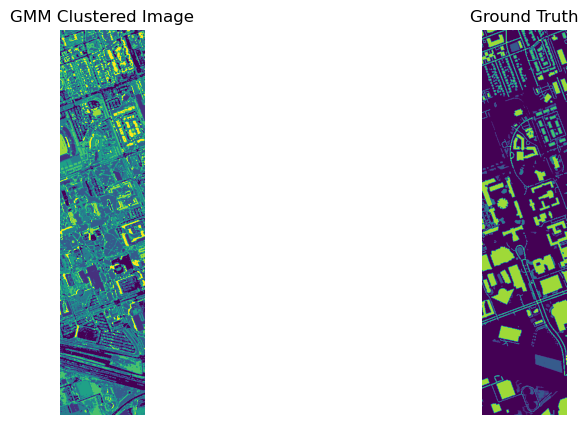

In [24]:
 from sklearn.mixture import GaussianMixture
 
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_clusters = gmm.fit_predict(data_pca)
gmm_clustered_image = gmm_clusters.reshape(954, 210)
gmm_accuracy = accuracy_score(data_gt.flatten(), gmm_clustered_image.flatten())
print(f"GMM Accuracy: {gmm_accuracy}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gmm_clustered_image, cmap='viridis')
plt.title('GMM Clustered Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(data_gt, cmap='viridis')
plt.title('Ground Truth')
plt.axis('off')

plt.show()


# PCA (Principal component analysis)

In [49]:
data_gt

array([[6., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       [6., 6., 0., ..., 7., 0., 0.],
       ...,
       [0., 0., 0., ..., 6., 6., 6.],
       [0., 0., 0., ..., 6., 6., 6.],
       [0., 0., 0., ..., 6., 6., 6.]])

In [50]:
data

array([[[0.01794693, 0.01875919, 0.01786958, ..., 0.02057709,
         0.01752147, 0.01752147],
        [0.02231763, 0.02193084, 0.01906862, ..., 0.01895258,
         0.01632243, 0.01632243],
        [0.02285913, 0.02065444, 0.02142802, ..., 0.017096  ,
         0.01551017, 0.01551017],
        ...,
        [0.02699776, 0.02722983, 0.02525721, ..., 0.03047884,
         0.03221939, 0.03221939],
        [0.02626286, 0.02703644, 0.02610815, ..., 0.03276089,
         0.03005338, 0.03005338],
        [0.02595343, 0.02680436, 0.02614682, ..., 0.03411464,
         0.03361182, 0.03361182]],

       [[0.04769088, 0.04080606, 0.0362033 , ..., 0.04003249,
         0.03423068, 0.03423068],
        [0.05248704, 0.04865785, 0.03933627, ..., 0.03357314,
         0.03194863, 0.03194863],
        [0.05712849, 0.05070782, 0.04676259, ..., 0.03214203,
         0.02966659, 0.02966659],
        ...,
        [0.05287383, 0.05380212, 0.05082386, ..., 0.0667595 ,
         0.06645007, 0.06645007],
        [0.0

In [52]:
data.shape
X=data.reshape(data.shape[0]*data.shape[1],-1)#iki boyutlu hale getirdim.
print(X)
print(X.shape)

[[0.01794693 0.01875919 0.01786958 ... 0.02057709 0.01752147 0.01752147]
 [0.02231763 0.02193084 0.01906862 ... 0.01895258 0.01632243 0.01632243]
 [0.02285913 0.02065444 0.02142802 ... 0.017096   0.01551017 0.01551017]
 ...
 [0.18554189 0.2024445  0.20932931 ... 0.29740079 0.32010521 0.32010521]
 [0.1718883  0.18264098 0.20743405 ... 0.29879322 0.32401176 0.32401176]
 [0.18306645 0.18090044 0.17672314 ... 0.28985844 0.30440164 0.30440164]]
(45792, 210)


In [53]:
rows,columns=X.shape
standardizedArray = np.zeros(shape=(rows, columns))
tempArray = np.zeros(rows)
print(standardizedArray)
print(standardizedArray.shape)
print(tempArray)
print(tempArray.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(45792, 210)
[0. 0. 0. ... 0. 0. 0.]
(45792,)


In [54]:
for column in range(columns):
        
        mean = np.mean(X[:,column])
        std = np.std(X[:,column])
        tempArray = np.empty(0)
        
        for element in X[:,column]:
            tempArray = np.append(tempArray, ((element - mean) / std))
        standardizedArray[:,column] = tempArray

In [55]:
data_standardized=standardizedArray

In [59]:
len(np.unique(data_standardized))

1726546

In [60]:
covariance_matrix=np.cov(data_standardized.T)
print(covariance_matrix.shape)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print(len(eigen_values))
print(len(eigen_vectors))
print(eigen_values.shape)
print(eigen_vectors.shape)

(210, 210)
210
210
(210,)
(210, 210)


In [61]:
eigen_values

array([ 5.16114626e+01,  1.80791988e+01,  1.49746128e+01,  1.32671255e+01,
        8.71639828e+00,  7.05946381e+00,  7.00866437e+00,  6.23257026e+00,
        5.72372396e+00,  5.33127807e+00,  4.38306213e+00,  4.25523441e+00,
        4.04254002e+00,  3.69171445e+00,  3.25857039e+00,  2.97426986e+00,
        2.65349943e+00,  2.58101507e+00,  2.33830808e+00,  2.22037815e+00,
        1.95208335e+00,  1.91560434e+00,  1.69754548e+00,  1.48785740e+00,
        1.37953472e+00,  1.33094075e+00,  1.27194780e+00,  1.17983572e+00,
        1.07022330e+00,  9.94684794e-01,  9.82337162e-01,  9.21467105e-01,
        8.88499875e-01,  8.49848872e-01,  8.03343941e-01,  7.54135367e-01,
        6.88382328e-01,  6.69074568e-01,  6.78151233e-01,  6.33523578e-01,
        6.20675496e-01,  5.72762031e-01,  5.39218460e-01,  5.09850173e-01,
        4.91191099e-01,  4.78777691e-01,  4.45286145e-01,  4.30956963e-01,
        4.08021778e-01,  3.82239984e-01,  3.62624452e-01,  3.60541006e-01,
        3.51346133e-01,  

In [62]:
variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)
        
print(variance_explained)

[24.576350263787667, 8.60895425935871, 7.130612292141976, 6.317540863934425, 4.150575204623877, 3.361576023346116, 3.337386340966915, 2.967825789588218, 2.7255233189974333, 2.5386484020583264, 2.0871268641775673, 2.026257847518417, 1.924977020274108, 1.7579208721543478, 1.551666297627763, 1.4162880510422216, 1.263543563726563, 1.2290279572180085, 1.1134557198302582, 1.0572998405664271, 0.9295431984354965, 0.9121726233434198, 0.8083373379037979, 0.7084880506068156, 0.6569069472787343, 0.6337674668120749, 0.6056762016262015, 0.5618142657313541, 0.5096190141917368, 0.4736490818578534, 0.46776938551756275, 0.4387842773081787, 0.42308593923337073, 0.4046811016755708, 0.3825363799804149, 0.3591042373617218, 0.3277939501012591, 0.3185999792747139, 0.3229221064701555, 0.30167130646697937, 0.29555330570873334, 0.27273786806883876, 0.25676508793780484, 0.2427804946333485, 0.23389541543726924, 0.22798439792568914, 0.2120363910698084, 0.20521311990098898, 0.19429184167516467, 0.18201506523832175, 

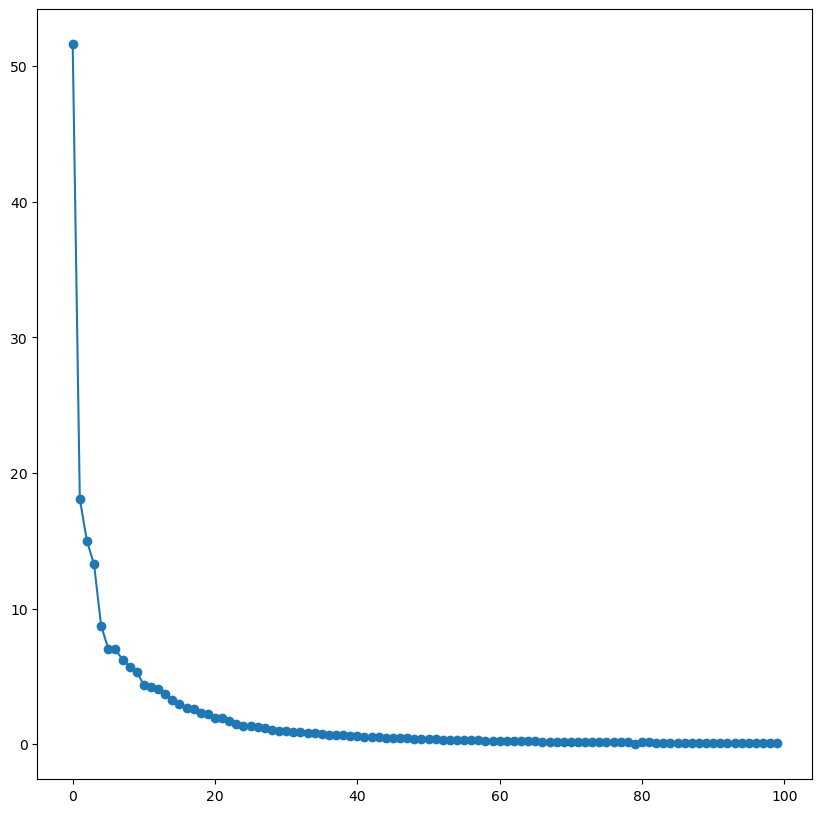

In [65]:
eigen_values1=eigen_values[0:100]
x=np.arange(0,len(eigen_values1),1)
plt.figure(figsize=(10,10))
plt.plot(x,eigen_values1,marker = 'o')
plt.show()

In [66]:
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)

[ 24.57635026  33.18530452  40.31591682  46.63345768  50.78403288
  54.14560891  57.48299525  60.45082104  63.17634436  65.71499276
  67.80211962  69.82837747  71.75335449  73.51127536  75.06294166
  76.47922971  77.74277328  78.97180123  80.08525695  81.14255679
  82.07209999  82.98427261  83.79260995  84.501098    85.15800495
  85.79177242  86.39744862  86.95926288  87.4688819   87.94253098
  88.41030037  88.84908464  89.27217058  89.67685168  90.05938806
  90.4184923   90.74628625  91.06488623  91.38780834  91.68947964
  91.98503295  92.25777082  92.51453591  92.7573164   92.99121182
  93.21919621  93.4312326   93.63644572  93.83073757  94.01275263
  94.18542717  94.35710962  94.52441364  94.68422043  94.83139811
  94.9760182   95.11597801  95.2508805   95.3813168   95.50617838
  95.62809164  95.73742778  95.85208695  95.96462566  96.06925606
  96.17173473  96.26825852  96.36337382  96.45743922  96.54574009
  96.6311885   96.71355902  96.79290618  96.87055505  96.94623779
  97.01905

In [67]:
ind=np.arange(0,len(eigen_values),1)
print(ind)
#eigen value ile indis ndarrayini birleştiriyorum
#https://stackoverflow.com/questions/6618515/sorting-list-based-on-values-from-another-list
ind=[x for _,x in sorted(zip(eigen_values,ind))]

print("\n")
print(ind)
ind=ind[::-1]#ters
print("\n")
print(ind)

eigen_values1=eigen_values[ind]
print("eigen values")
print(eigen_values1)
eigen_vectors1=eigen_vectors[:,ind]
print("eigenvectors")
print(eigen_vectors1)
eigen_vectors1=eigen_vectors1[:,:3]
print("eigenvectors")
print(eigen_vectors1)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209]


[79, 134, 135, 136, 137, 147, 148, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 171, 172, 173, 174, 175, 176, 182, 185, 186, 191, 183, 

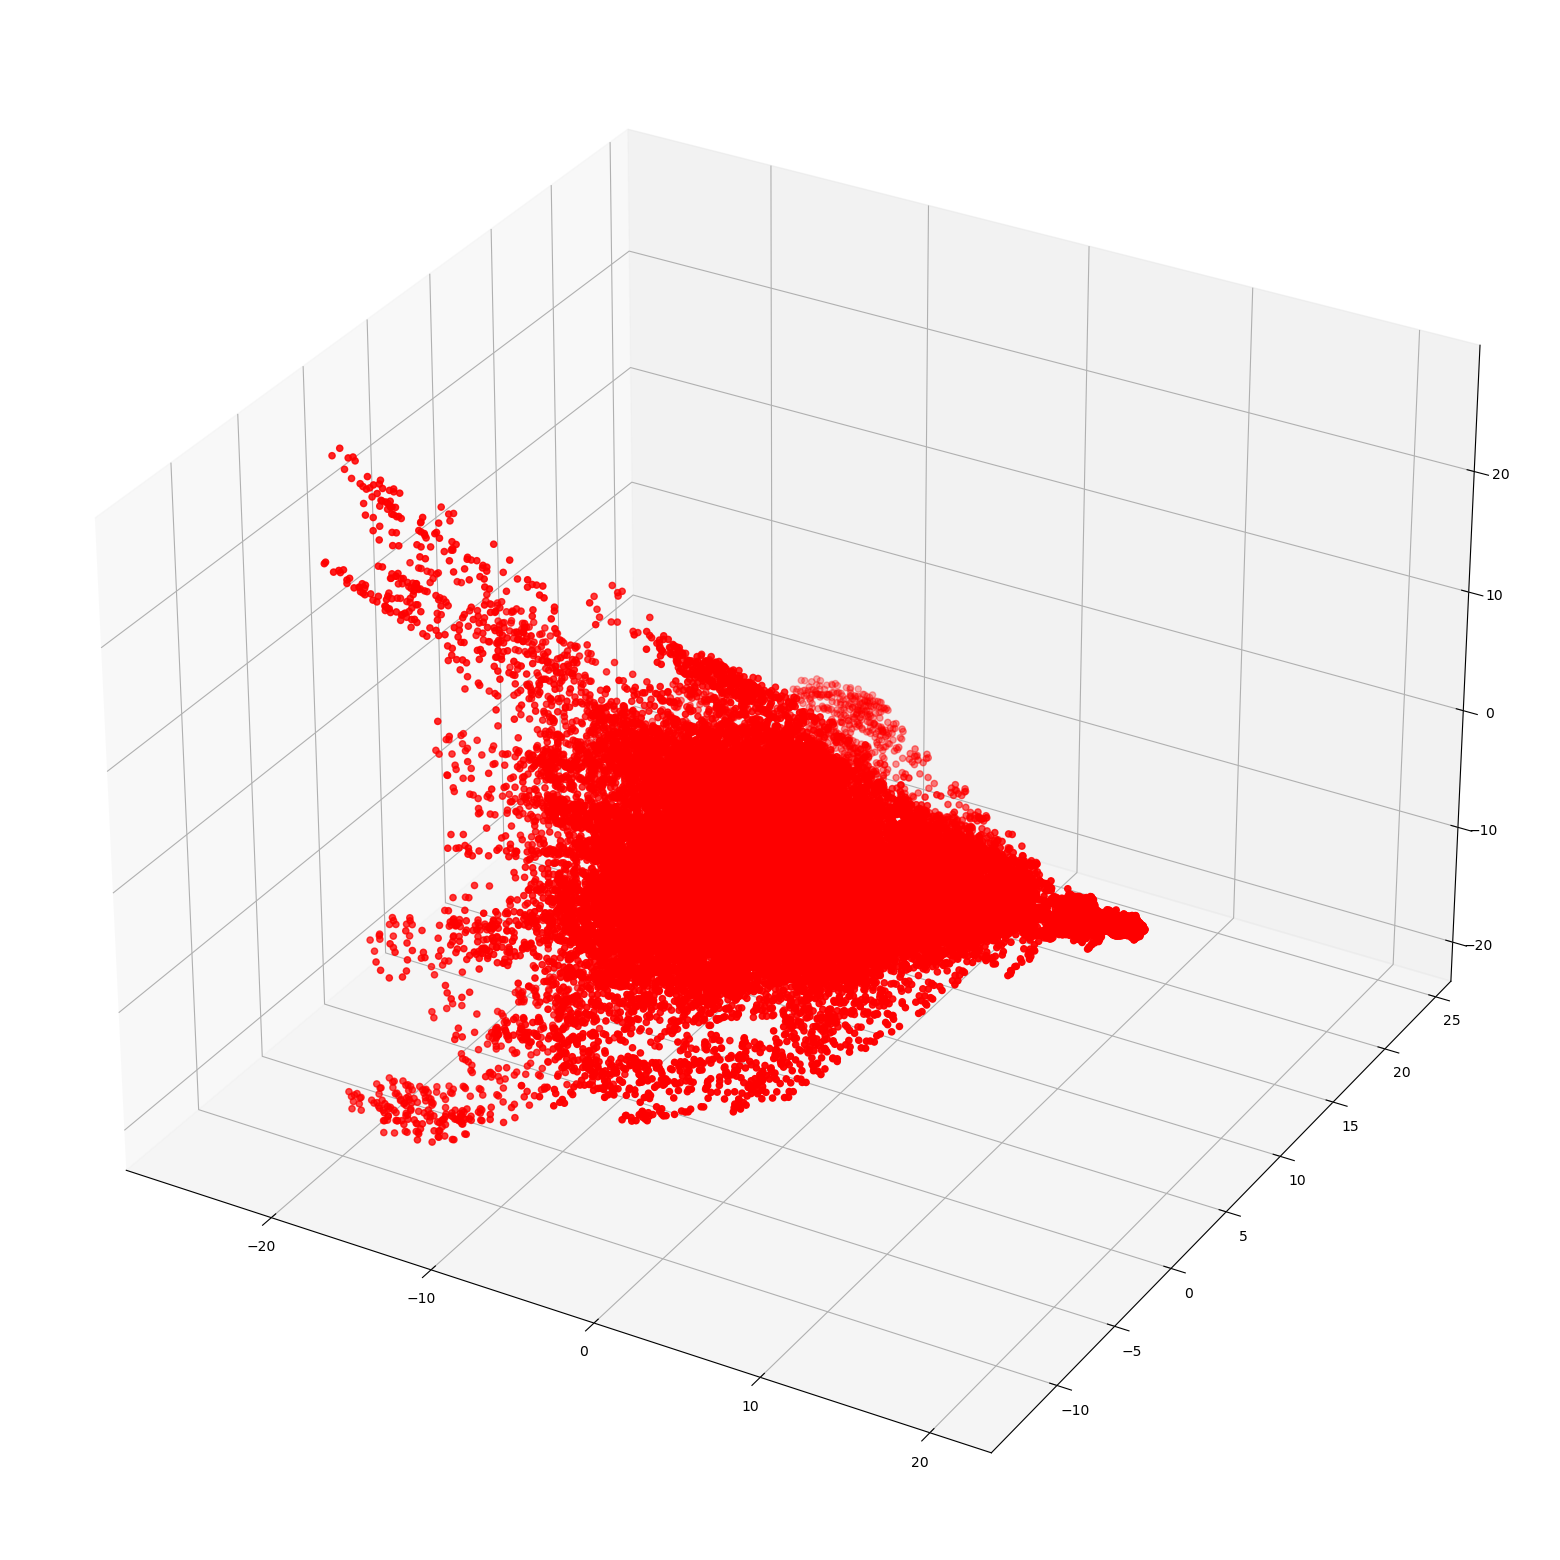

In [69]:
y=(eigen_vectors1.T).dot(data_standardized.T) 
fig = plt.figure(figsize = (20, 20))
ax = plt.axes(projection ="3d")
ax.scatter3D(y[0,:], y[1,:], y[2,:], color = "red")

In [70]:
#projection_matrix derinliğini duruma göre değiştirebilirim. şu an 3 seçilmiş durumda.
projection_matrix = (eigen_vectors.T[:][:40]).T
                    
print(projection_matrix)
len(projection_matrix)
projection_matrix.shape

[[-0.06102719 -0.02283838 -0.0072121  ...  0.08295829 -0.00095037
  -0.13936322]
 [-0.06544971 -0.01838704 -0.00304441 ...  0.08333424 -0.02778524
  -0.08602153]
 [-0.06806573 -0.01791951 -0.00022129 ...  0.06544787 -0.06002726
  -0.01931198]
 ...
 [-0.04671202 -0.07314929 -0.12313559 ...  0.04861466  0.05773574
   0.03532694]
 [-0.04583381 -0.06539449 -0.12214502 ...  0.05067417  0.07833513
   0.05455716]
 [-0.04583381 -0.06539449 -0.12214502 ...  0.05067417  0.07833513
   0.05455716]]


(210, 40)

In [71]:
finaldataset=data_standardized.dot(projection_matrix)

In [74]:
finaldataset

array([[ 1.96105658e+01,  1.88853793e+00,  1.44807898e+00, ...,
         1.53917504e-01,  1.67253720e-02, -1.26047821e-02],
       [ 1.95532995e+01,  1.89278212e+00,  1.41771734e+00, ...,
         1.47936859e-01,  4.19587879e-02,  1.92207620e-05],
       [ 1.95497242e+01,  1.91800823e+00,  1.47716242e+00, ...,
         9.90477488e-02,  5.66637993e-02,  3.21860656e-02],
       ...,
       [-1.00593768e+01, -4.79219500e+00, -3.65050820e+00, ...,
         1.67408107e+00,  3.92762352e-01,  6.89374445e-01],
       [-9.94667860e+00, -4.68686307e+00, -4.15983649e+00, ...,
         1.10098480e+00,  9.53234773e-01,  5.96567416e-01],
       [-1.01428013e+01, -4.32381872e+00, -3.49986966e+00, ...,
         9.39384460e-01,  1.16681270e+00,  3.15568283e-01]])

In [75]:
o,a=finaldataset.shape

In [76]:
finaldataset.shape

(45792, 40)

In [77]:
print(np.unique(data_gt))
cluster=len(np.unique(data_gt))

[0. 1. 2. 3. 4. 5. 6. 7.]


In [82]:
finaldataset=finaldataset.reshape(48,954,a)

In [83]:
finaldataset

array([[[ 1.96105658e+01,  1.88853793e+00,  1.44807898e+00, ...,
          1.53917504e-01,  1.67253720e-02, -1.26047821e-02],
        [ 1.95532995e+01,  1.89278212e+00,  1.41771734e+00, ...,
          1.47936859e-01,  4.19587879e-02,  1.92207620e-05],
        [ 1.95497242e+01,  1.91800823e+00,  1.47716242e+00, ...,
          9.90477488e-02,  5.66637993e-02,  3.21860656e-02],
        ...,
        [ 1.85867720e+01,  1.76569044e+00,  8.87282518e-01, ...,
          7.91135302e-02,  3.79834960e-02,  4.54704484e-02],
        [ 1.85524751e+01,  1.74277877e+00,  8.66101900e-01, ...,
          1.06935612e-01,  2.43663447e-02,  3.80388597e-02],
        [ 1.84914642e+01,  1.71313394e+00,  8.32736731e-01, ...,
          8.16419893e-02,  4.05558597e-02,  2.29842977e-02]],

       [[ 1.70445078e+01,  1.44817489e+00,  1.07874666e+00, ...,
          2.00709226e-01, -1.62211346e-02, -7.29532261e-02],
        [ 1.69936777e+01,  1.44426227e+00,  1.03199978e+00, ...,
          1.85648690e-01, -4.06116901e

In [84]:
(h,w,c)=finaldataset.shape

In [85]:
finaldataset =finaldataset.reshape(h*w,c)

In [108]:
finaldataset.shape

(45792, 40)